# Imbalanced Classifcation
*****
- Classification of the mamography dataset 
- Aplication of data-level techniques (**oversampling** and **SMOTE**)


## Importing needed libraries
*****

In [39]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# The Problem
*****
- To detect breast cancer from radiological scans, specifically the presence of clusters of microcalcifications that appear bright on a mammogram.
- Dataset from: Woods, Kevin S., et al. "Comparative evaluation of pattern recognition techniques for detection of microcalcifications in mammography." State of The Art in Digital Mammographic Image Analysis. 1994. 213-231 [link](https://www.worldscientific.com/doi/abs/10.1142/9789812797834_0011).

# Dataset
*****
Each sample is respresented by 6 features: 
- Area of object (in pixels).
- Average gray level of the object.
- Gradient strength of the object’s perimeter pixels.
- Root mean square noise fluctuation in the object.
- Contrast, average gray level of the object minus the average of a two-pixel wide border surrounding the object.
- A low order moment based on shape descriptor.

Classes:
- Non-microcalcifications: negative case, or majority class.
- Microcalcifications: positive case, or minority class.

### Reading Data

In [2]:
df = pd.read_csv("../data/mammography.csv", header=None)

In [3]:
df.columns =['Area_Obj', 'Avg_Gray', 'Grad', 'RMS', "Cont", 'Momentum', "Class"]

In [4]:
mask_positive = df["Class"] == "'1'"
mask_negative = ~mask_positive

In [5]:
df.loc[mask_positive, "Class"] = 1


In [6]:
df.loc[mask_negative, "Class"] = 0

In [7]:
df

,Area_Obj,Avg_Gray,Grad,RMS,Cont,Momentum,Class
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,0
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,0
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,0
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,0
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,0
...,...,...,...,...,...,...,...
11178,-0.250012,-0.377300,-0.321142,1.269157,3.652984,1.092791,1
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.345700,1
11180,1.204988,1.763724,-0.501468,1.562408,6.489072,0.931294,1
11181,0.736644,-0.222474,-0.050653,1.509665,0.539269,1.315229,1


## Class Distribution

In [40]:
values = df["Class"].value_counts()

0    10923
1      260
Name: Class, dtype: int64

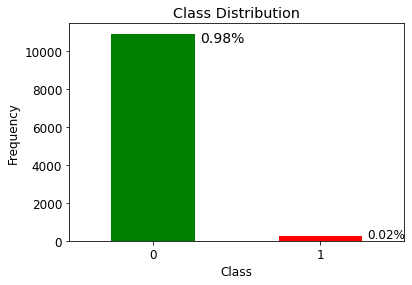

In [41]:
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)


pd.value_counts(df["Class"]).plot.bar(rot=0, color=["green", "red"])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.text(0.28, 10500,str(round(values[0]/(values[0]+values[1]),2)) + "%", fontsize=14)
plt.text(1.28, 150,  str(round(values[1]/(values[0]+values[1]),2)) + "%", fontsize=12)

df["Class"].value_counts()

## Generating training and testing data

In [11]:
y = df["Class"]
y = y.astype(int)

X = df.iloc[:,0:6]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                test_size=0.2, random_state=0)

In [13]:
print((y_train == 0).sum())
print((y_train == 1).sum())


8739
207


In [14]:
pd.value_counts(y_train)[0]

8739

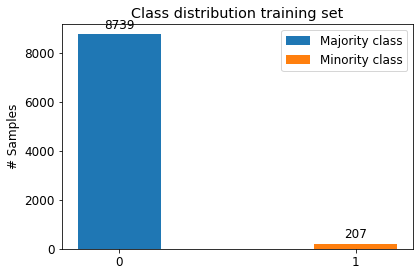

In [15]:
fig, ax = plt.subplots()
rects1 = ax.bar(0, pd.value_counts(y_train)[0], 0.35, label='Majority class')
rects2 = ax.bar(1, pd.value_counts(y_train)[1], 0.35, label='Minority class')
ax.set_ylabel('# Samples')
ax.set_title('Class distribution training set')
ax.set_xticks([0,1])
ax.set_xticklabels(['0','1'])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

In [42]:
def plot_classes(X, y, title, var1,var2, xlab, ylab):
    plt.figure()
    plt.scatter(X[:,var1][y != 1],X[:,var2][y != 1], c="m", alpha=0.2)
    plt.scatter(X[:,var1][y == 1],X[:,var2][y == 1], c="c")
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.show()

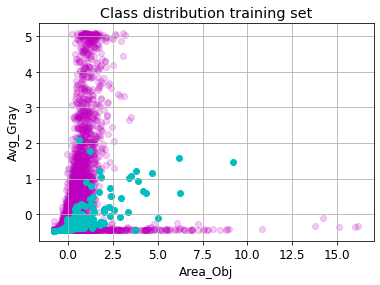

In [43]:
plot_classes(X_train.values,y_train.values, 
             "Class distribution training set", 0,1, df.columns[0], df.columns[1])

--------------
## Classifaction with imbalanced data
--------------

In [44]:
def classif_model(X_train, y_train):
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1)
    clf.fit(X_train, y_train)
    return clf

def prediction(X_test,clf):
    y_pred_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    return y_pred_prob, y_pred


clf = classif_model(X_train,y_train)
y_pred_prob, y_pred = prediction(X_test,clf) 

F1: 0.53  -- prec: 0.78  -- recall: 0.40  -- acc: 0.98


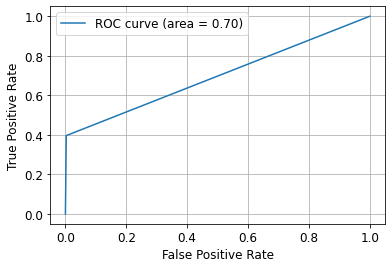

,0,1,accuracy,macro avg,weighted avg
precision,0.985520,0.777778,0.983013,0.881649,0.980598
recall,0.997253,0.396226,0.983013,0.696740,0.983013
f1-score,0.991352,0.525000,0.983013,0.758176,0.980303
support,2184.000000,53.000000,0.983013,2237.000000,2237.000000


[[2178    6]
 [  32   21]]


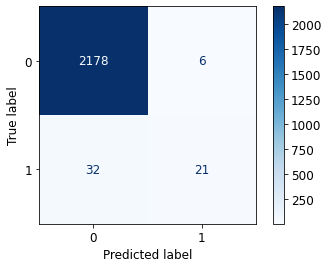

In [45]:
def show_metrics(y_test, y_pred):
    fpr, tpr, ths = roc_curve(y_test,  y_pred)
    auc_ = auc(fpr, tpr)
    f1 = f1_score(y_test,  (y_pred>.5))
    prec = precision_score(y_test,  (y_pred>.5))
    rec = recall_score(y_test,  (y_pred>.5))
    acc = accuracy_score(y_test,  (y_pred>.5))
    print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()
    d = classification_report(y_test, y_pred,output_dict=True)
    display(pd.DataFrame.from_dict(d))
    
    
show_metrics(y_test, y_pred)
cm_0 = confusion_matrix(y_test, y_pred)
print(cm_0)
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues)

--------------------------------------
## Balancing data with Random Oversampling
--------------------------------------

In [46]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_train, y_train)



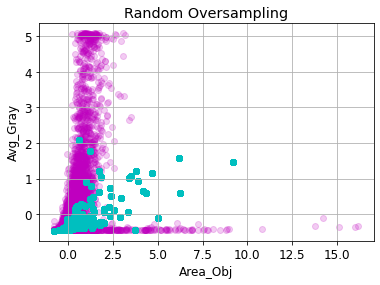

In [47]:
plot_classes(X_ros.values,y_ros.values, 
             "Random Oversampling", 0,1, df.columns[0], df.columns[1])

F1: 0.31  -- prec: 0.19  -- recall: 0.85  -- acc: 0.91


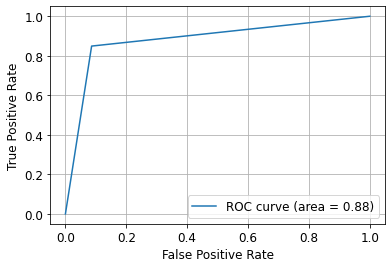

,0,1,accuracy,macro avg,weighted avg
precision,0.996008,0.193133,0.912383,0.594571,0.976986
recall,0.913919,0.849057,0.912383,0.881488,0.912383
f1-score,0.953200,0.314685,0.912383,0.633942,0.938072
support,2184.000000,53.000000,0.912383,2237.000000,2237.000000


[[1996  188]
 [   8   45]]


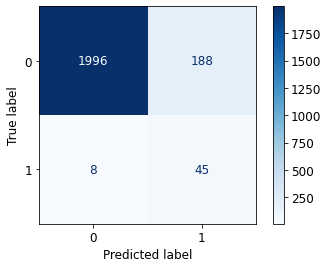

In [49]:
clf_ros = classif_model(X_ros, y_ros)
y_pred_prob_ros , y_pred_ros = prediction(X_test, clf_ros)
show_metrics(y_test, y_pred_ros)

cm = confusion_matrix(y_test, y_pred_ros)
print(cm)
plot_confusion_matrix(clf_ros, X_test, y_test, cmap = plt.cm.Blues)

--------------------------------------
## Balancing data with SMOTE
--------------------------------------

In [50]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

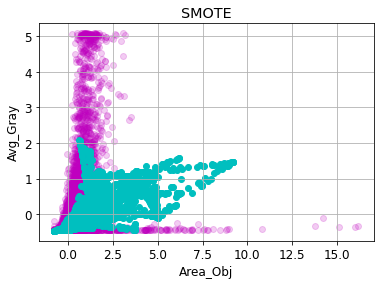

In [51]:
plot_classes(X_smote.values,y_smote.values, 
             "SMOTE", 0,1, df.columns[0], df.columns[1])

F1: 0.35  -- prec: 0.22  -- recall: 0.83  -- acc: 0.93


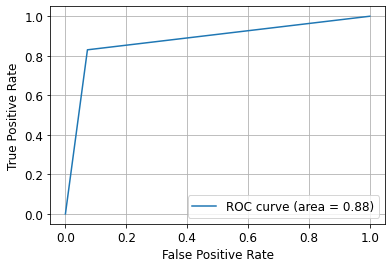

,0,1,accuracy,macro avg,weighted avg
precision,0.995577,0.217822,0.925346,0.606700,0.977150
recall,0.927656,0.830189,0.925346,0.878922,0.925346
f1-score,0.960417,0.345098,0.925346,0.652758,0.945839
support,2184.000000,53.000000,0.925346,2237.000000,2237.000000


[[2026  158]
 [   9   44]]


In [52]:
clf_smt = classif_model(X_smote, y_smote)
y_pred_prob_smt , y_pred_smt = prediction(X_test, clf_smt)
show_metrics(y_test, y_pred_smt)

cm = confusion_matrix(y_test, y_pred_smt)
print(cm)

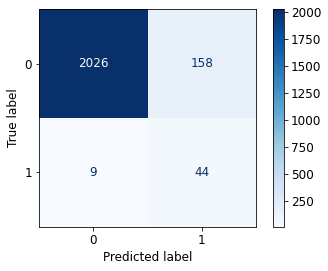

In [53]:

plot_confusion_matrix(clf_smt, X_test, y_test, cmap = plt.cm.Blues)